## Dataset Information

#Overview

This dataset contains 1,000,000 anonymized credit card transactions with 7 input features and 1 label total 8 column.
Even though the dataset includes a fraud column, for unsupervised learning, this label will be ignored during training and used only for evaluation.

#Dataset Suitability for Unsupervised Learning

1) This dataset is excellent for unsupervised learning because:
2) Fraud cases are rare (8.7%), making this a classic anomaly detection problem.
3) Features describe behavioral patterns, allowing clustering or reconstruction-based anomaly detection.
4) All features are numerical, simplifying scaling and model training

# Import libraries

In [219]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Dataset

In [220]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [221]:
# statistical info
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [222]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Preprocessing The Dataset

In [223]:
# check for null values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Exploratory Data Analysis (EDA)

In [224]:
df['fraud'].value_counts()


fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

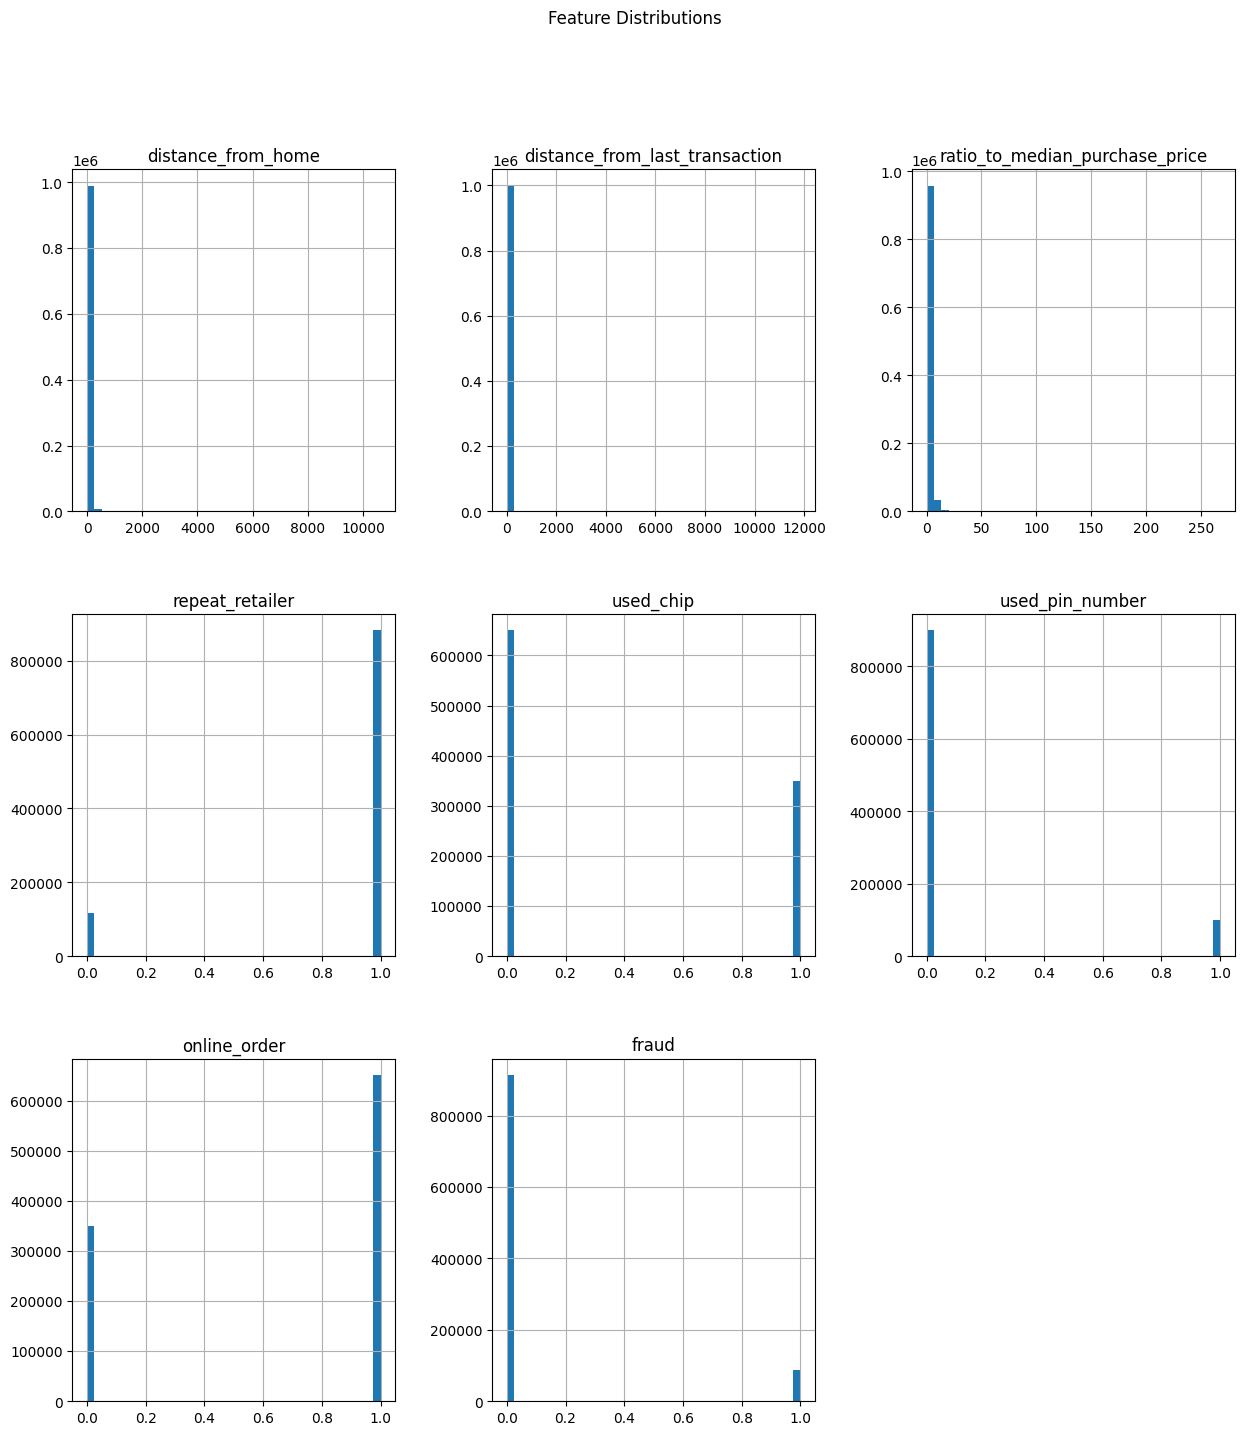

In [225]:
#Feature Distributions 
df.hist(figsize=(15,16), bins=40)
plt.suptitle("Feature Distributions")
plt.show()


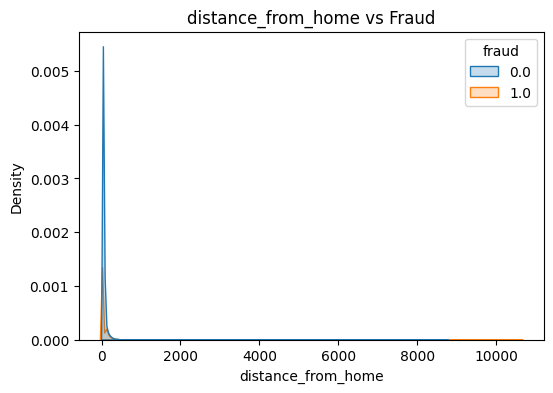

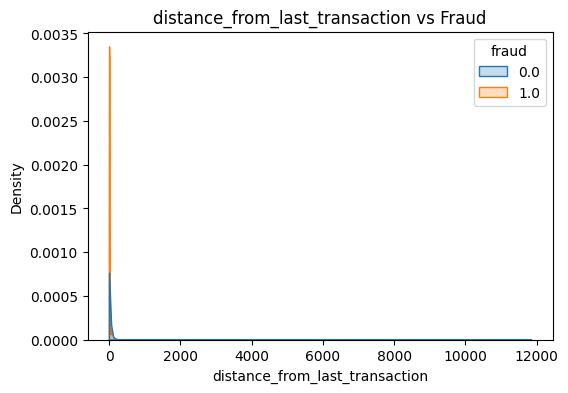

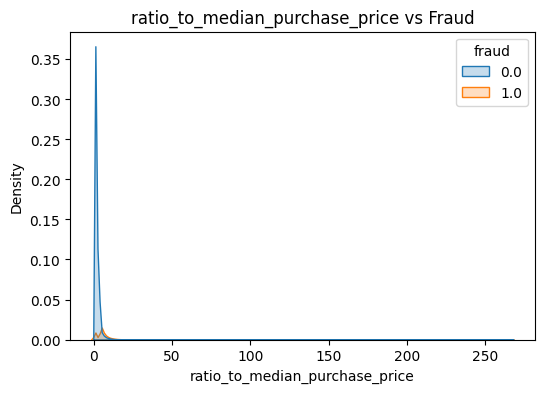

In [226]:
#Fraud vs. Transaction Behaviors
cols = ['distance_from_home', 'distance_from_last_transaction',
        'ratio_to_median_purchase_price']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='fraud', fill=True)
    plt.title(f"{col} vs Fraud")
    plt.show()


# Correlation Matrix

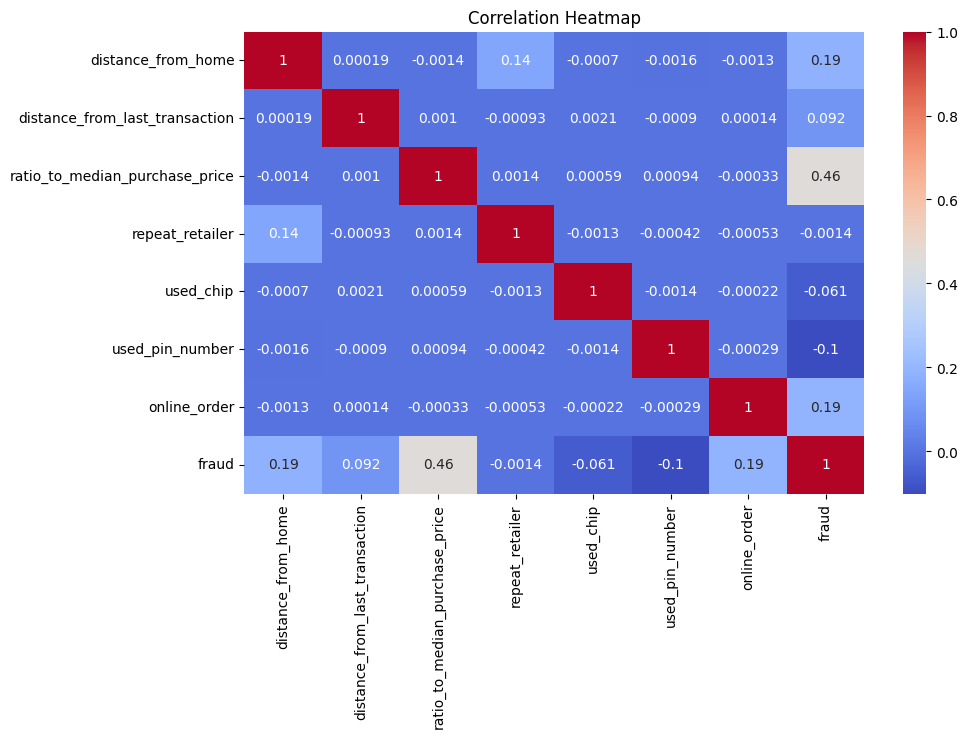

In [227]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Feature Engineering
Scaling

In [228]:
# separate label
X = df.drop(columns=['fraud'])
y = df['fraud']

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [230]:
scaled

array([[ 0.47788202, -0.18284892,  0.04349141, ...,  1.36157608,
        -0.33445812, -1.36442519],
       [-0.24160679, -0.18809398, -0.18930045, ..., -0.73444298,
        -0.33445812, -1.36442519],
       [-0.3293694 , -0.16373307, -0.49881185, ..., -0.73444298,
        -0.33445812,  0.73290937],
       ...,
       [-0.36264968, -0.13790278, -0.57369398, ...,  1.36157608,
        -0.33445812,  0.73290937],
       [-0.34209827, -0.1855234 , -0.48162807, ..., -0.73444298,
        -0.33445812,  0.73290937],
       [ 0.48140344, -0.18257921, -0.51338354, ...,  1.36157608,
        -0.33445812,  0.73290937]], shape=(1000000, 7))

## Principal component analysis (PCA)

In [231]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(scaled)

In [232]:
pca_2d

array([[ 0.59969677,  0.91092317],
       [ 0.11206765, -0.48310918],
       [ 0.03104095, -0.53294565],
       ...,
       [-0.01359247,  0.80840245],
       [ 0.02212058, -0.54310856],
       [ 0.58332738,  0.79847738]], shape=(1000000, 2))

In [233]:

sample_size = 40000
ios = np.random.choice(len(pca_2d), size=sample_size, replace=False)

pca_data = pca_2d[ios]              


In [234]:
pca_data

array([[ 0.24710882, -0.46482245],
       [-2.19842026, -0.05709939],
       [ 0.24255441,  0.80662599],
       ...,
       [ 0.05925861, -0.48077677],
       [-2.19338959, -0.48202495],
       [ 0.16650079, -0.36127284]], shape=(40000, 2))

## Choosing cluster a best k

 Elbow Method

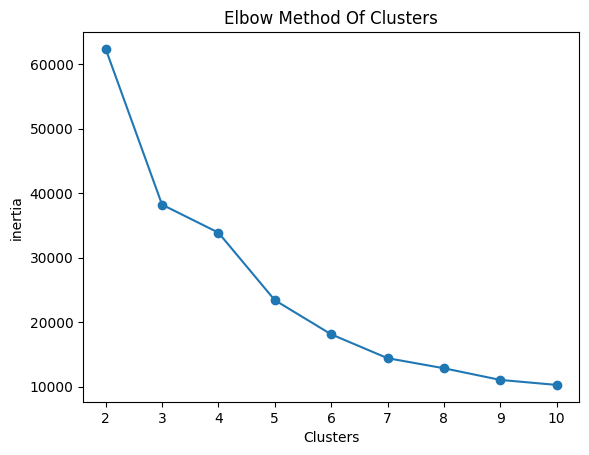

In [235]:
from sklearn.cluster import KMeans
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_data)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Clusters")
plt.ylabel("inertia")
plt.title("Elbow Method Of Clusters")
plt.show()

Silhouette Score

In [236]:
from sklearn.metrics import silhouette_score

sample_idx = np.random.choice(len(pca_data), size=40000, replace=False)
pca_sample = pca_data[sample_idx]

for k in range(2, 11):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(pca_sample)
    score = silhouette_score(pca_sample, labels)
    print(f"k = {k} → Silhouette Score = {score}")

k = 2 → Silhouette Score = 0.46923205703747356
k = 3 → Silhouette Score = 0.6249101184020847
k = 4 → Silhouette Score = 0.6404728107483586
k = 5 → Silhouette Score = 0.6427081204870579
k = 6 → Silhouette Score = 0.6678966298633454
k = 7 → Silhouette Score = 0.69401348922288
k = 8 → Silhouette Score = 0.7093133084039629
k = 9 → Silhouette Score = 0.7139159650851226
k = 10 → Silhouette Score = 0.7183445870851085


## Model Training
K-means Clustering

In [237]:
km = KMeans(n_clusters=5, random_state=42)
clusters = km.fit_predict(pca_data)

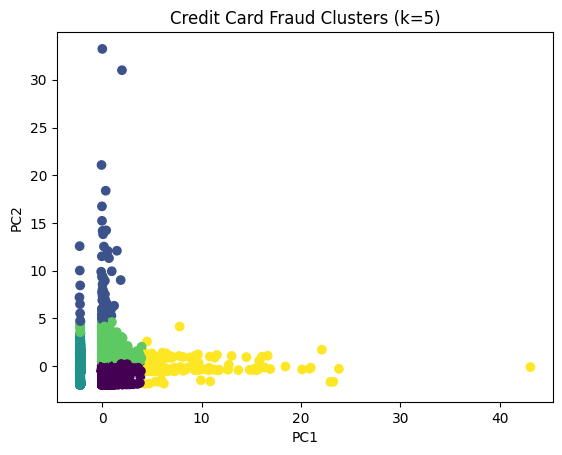

In [238]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Credit Card Fraud Clusters (k=5)")
plt.show()

 IsolationForest model

In [239]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.087, random_state=42)
iso_labels = iso.fit_predict(scaled)

# Convert -1 (outlier) → 1 (fraud), 1 → 0
iso_pred = np.where(iso_labels == 1, 0, 1)

In [240]:
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

# Evaluate against true fraud labels
print("Confusion Matrix:")
print(confusion_matrix(y, iso_pred))

print("\nClassification Report:")
print(classification_report(y, iso_pred))


Confusion Matrix:
[[843637  68960]
 [ 69366  18037]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    912597
         1.0       0.21      0.21      0.21     87403

    accuracy                           0.86   1000000
   macro avg       0.57      0.57      0.57   1000000
weighted avg       0.86      0.86      0.86   1000000



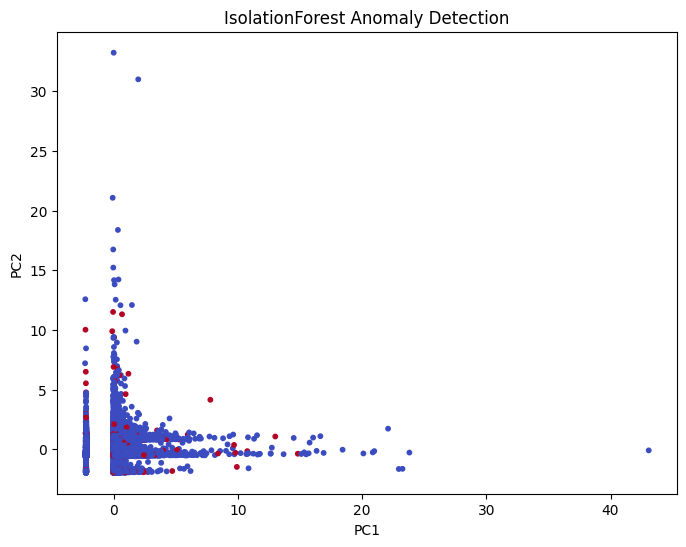

In [241]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=iso_pred[idx], cmap='coolwarm', s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("IsolationForest Anomaly Detection")
plt.show()


In [242]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)  
db_labels = dbscan.fit_predict(pca_data)

# Number of clusters (-1 represents noise)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Estimated number of clusters: 2
Estimated number of noise points: 131


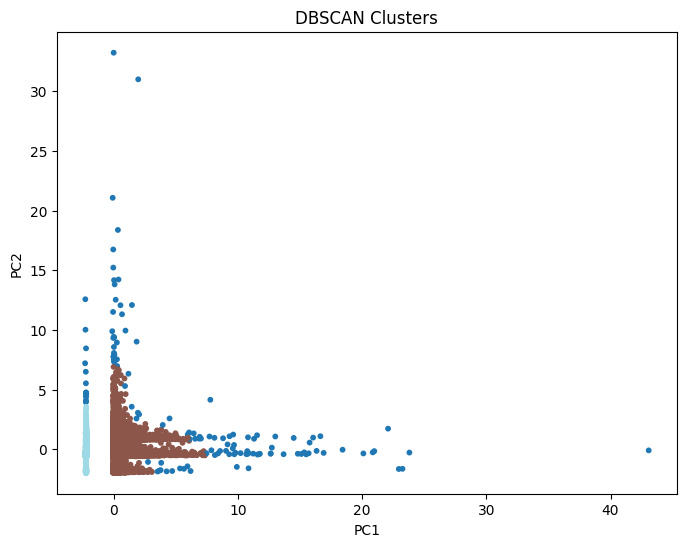

In [243]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=db_labels, cmap='tab20', s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clusters")
plt.show()
